# 음성의 pitch를 관찰하는 프로그램
좋은 feature 인듯

In [10]:
import pandas as pd
from IPython.display import Audio, display
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [11]:
seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [12]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


In [13]:
display(Audio("./train/RUNQPNJF.ogg"))

In [3]:
# piptrack 함수 사용
pitches, magnitudes = librosa.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

# 결과 분석
time = librosa.times_like(pitches)
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.title('Estimated pitches')
plt.imshow(pitches, aspect='auto', origin='lower', interpolation='nearest')
plt.colorbar(label='Frequency (Hz)')
plt.ylabel('Frequency bin')
plt.xlabel('Time')

plt.subplot(212)
plt.title('Pitch magnitudes')
plt.imshow(magnitudes, aspect='auto', origin='lower', interpolation='nearest')
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency bin') 
plt.xlabel('Time')

plt.tight_layout()
plt.show()

# 가장 강한 피치 추출
pitch_strongest = np.argmax(magnitudes, axis=0)
pitches_strongest = pitches[pitch_strongest, range(pitches.shape[1])]

plt.figure(figsize=(12, 4))
plt.plot(time, pitches_strongest)
plt.title('Strongest pitch over time')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

# 기본 통계
pitch_mean = np.mean(pitches_strongest[pitches_strongest > 0])
pitch_std = np.std(pitches_strongest[pitches_strongest > 0])
print(f"Mean pitch: {pitch_mean:.2f} Hz")
print(f"Pitch standard deviation: {pitch_std:.2f} Hz")


NameError: name 'y' is not defined

In [15]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

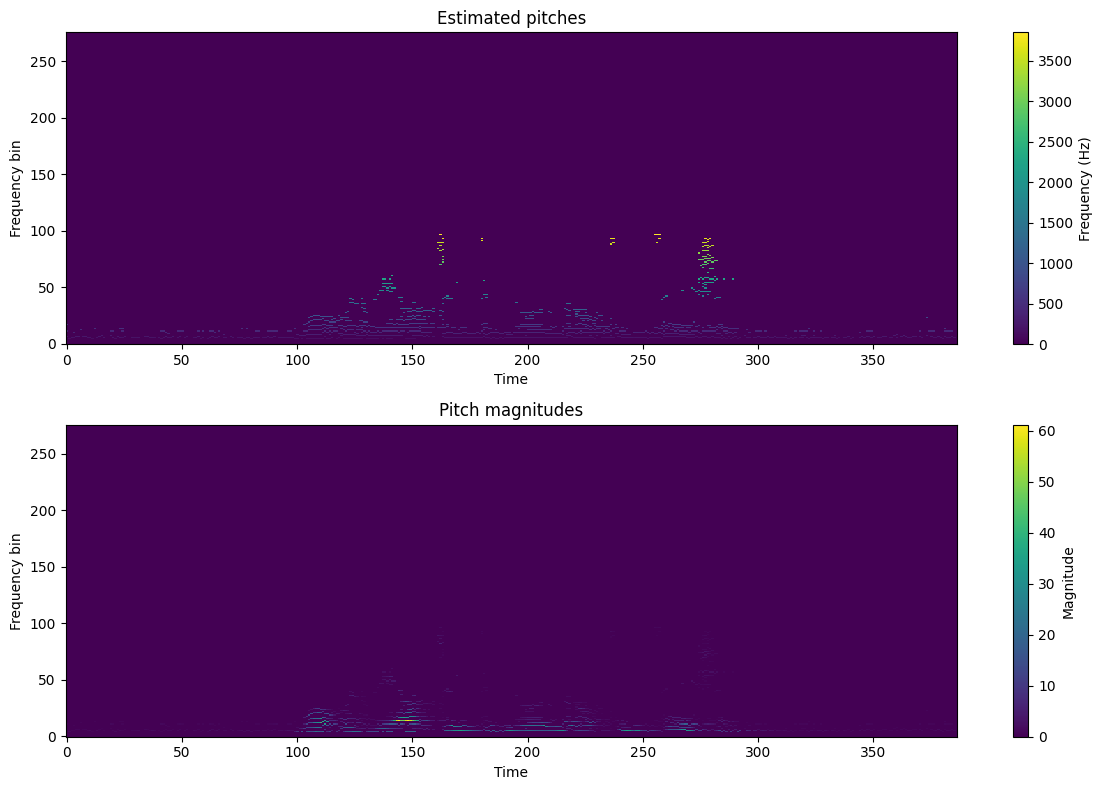

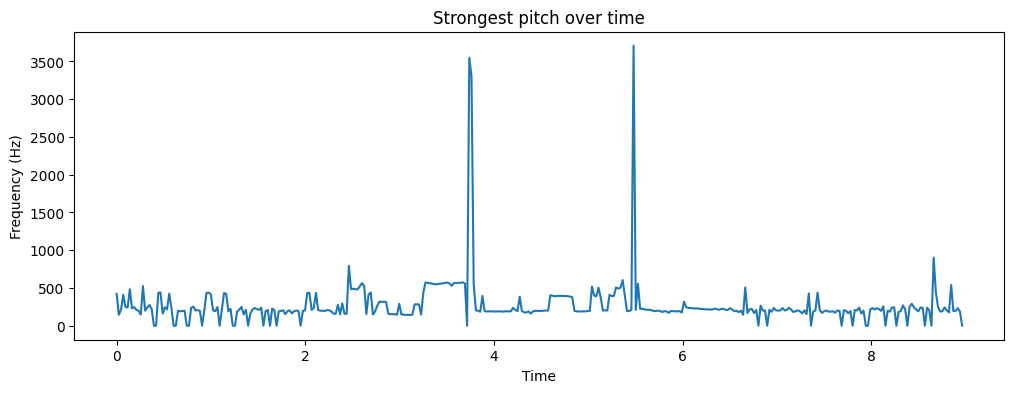

Mean pitch: 294.29 Hz
Pitch standard deviation: 322.61 Hz


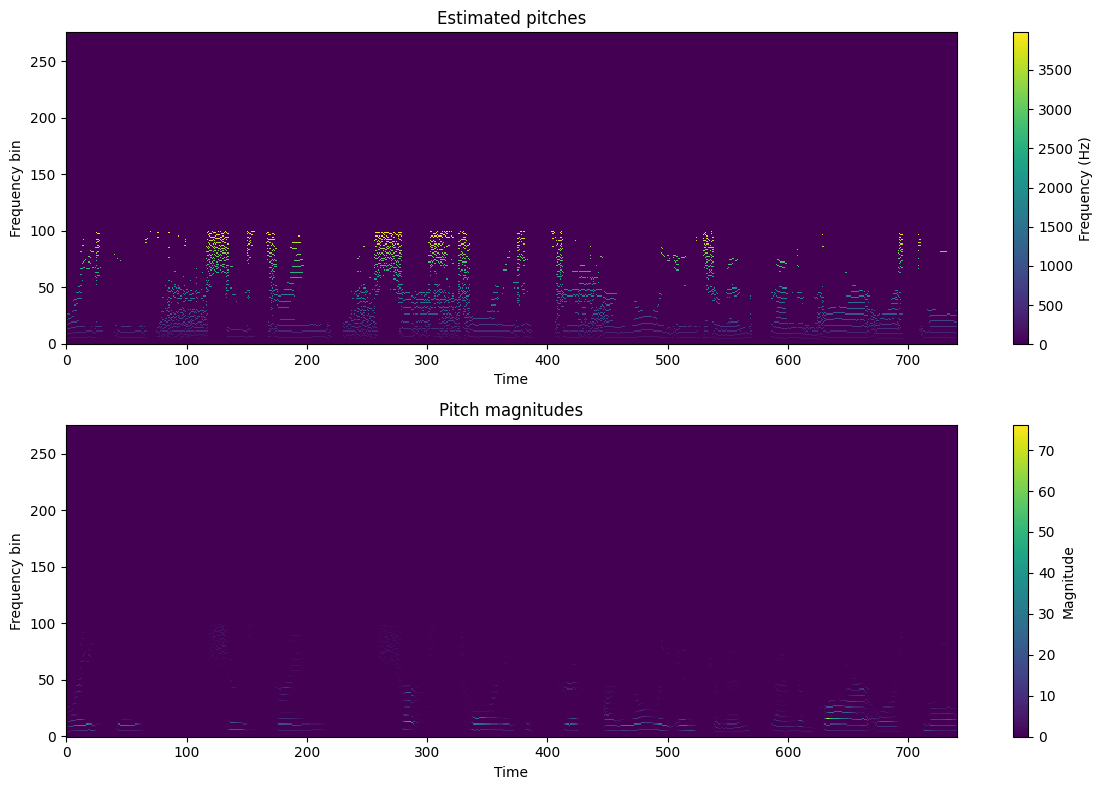

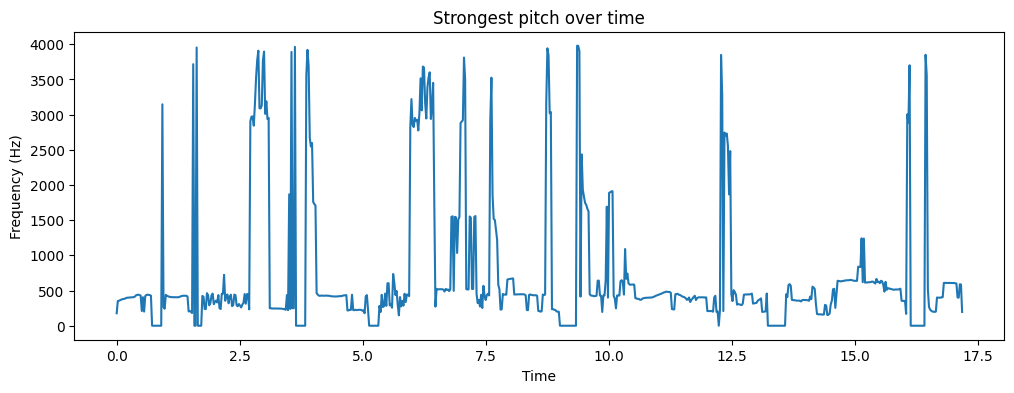

Mean pitch: 804.17 Hz
Pitch standard deviation: 949.01 Hz


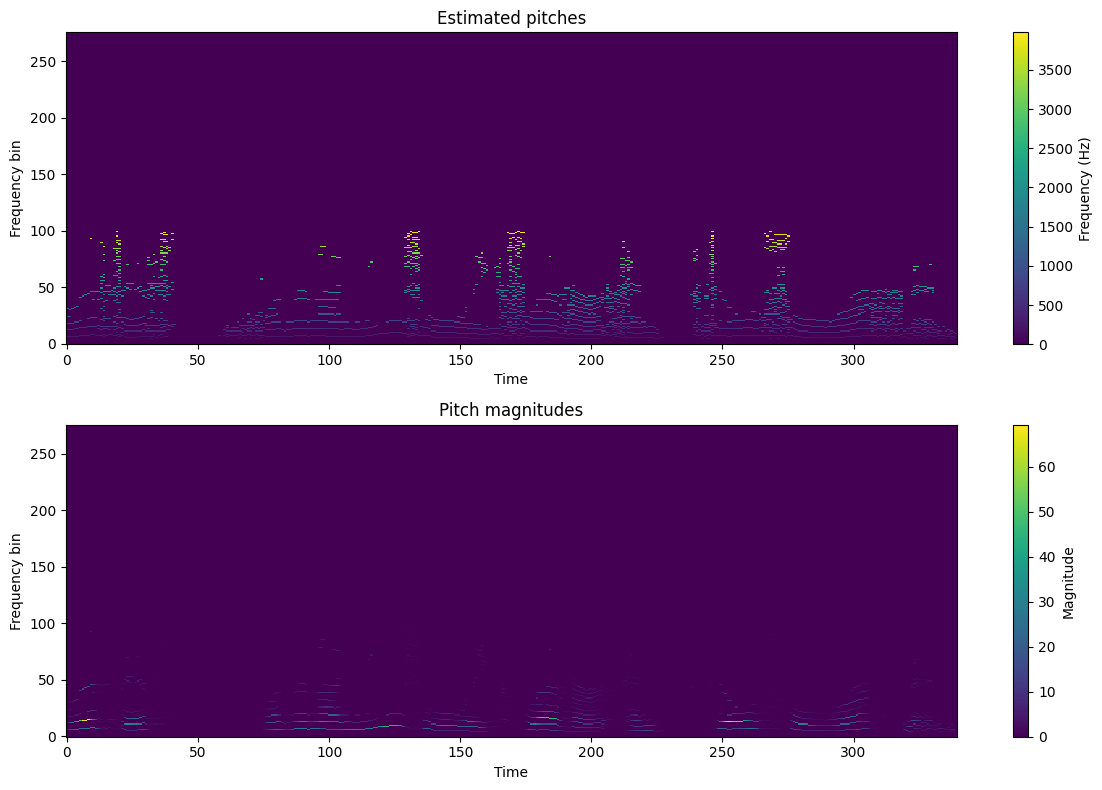

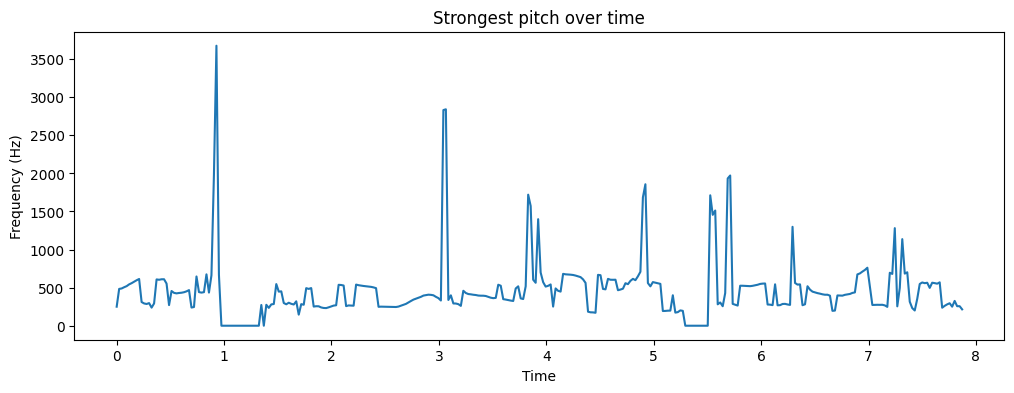

Mean pitch: 496.04 Hz
Pitch standard deviation: 390.12 Hz


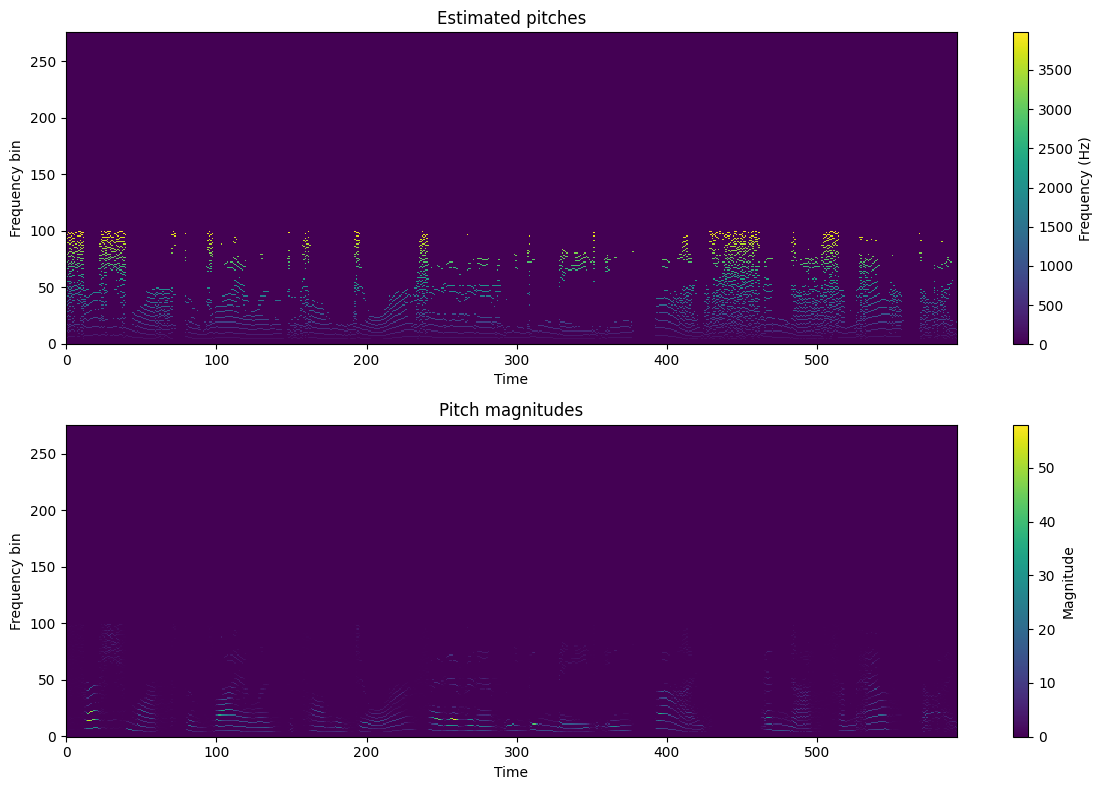

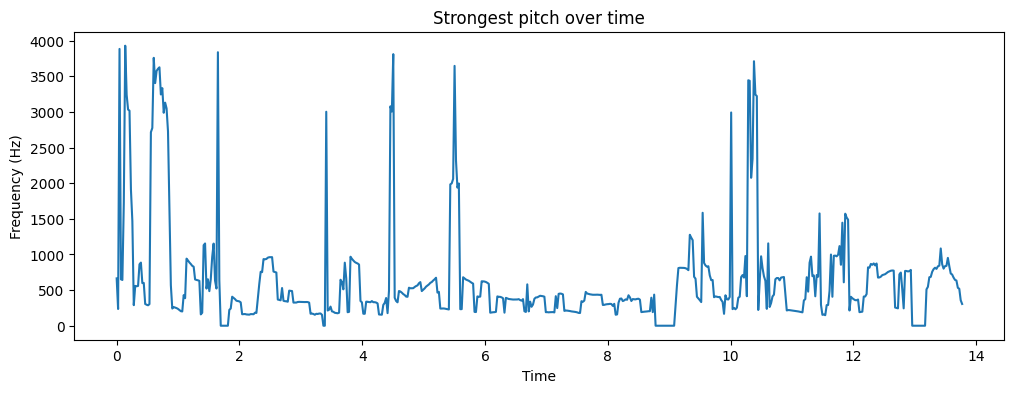

Mean pitch: 667.11 Hz
Pitch standard deviation: 719.25 Hz


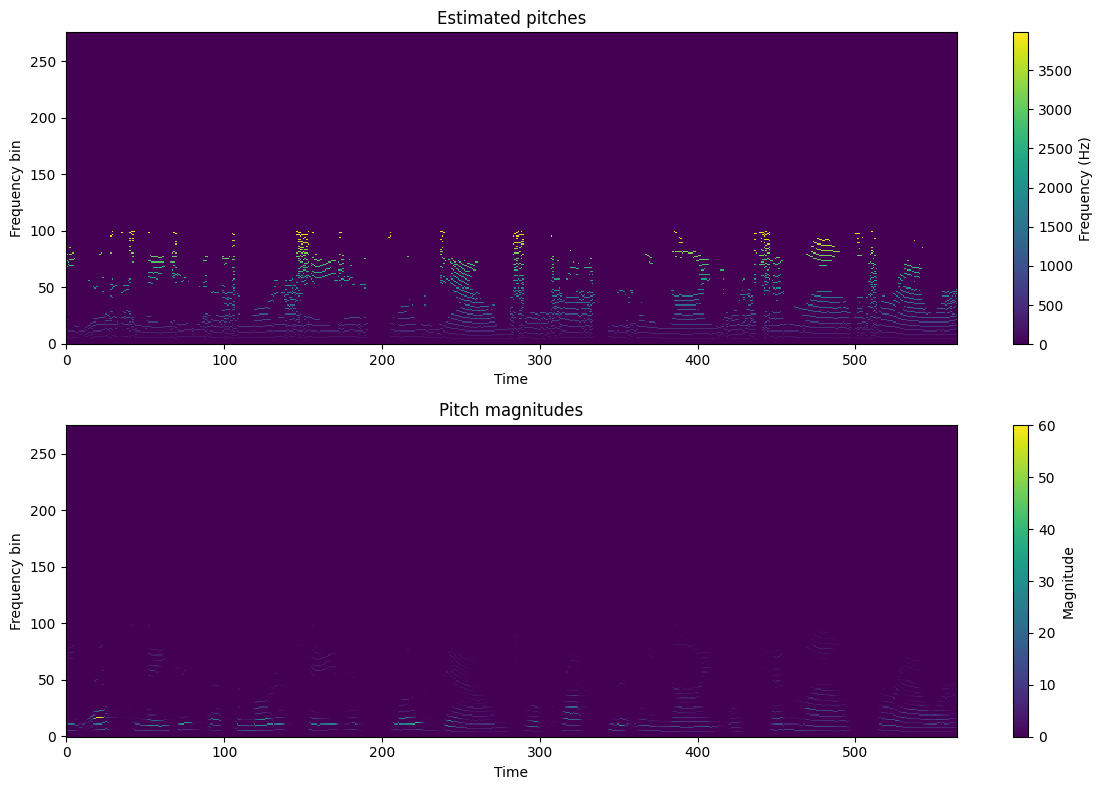

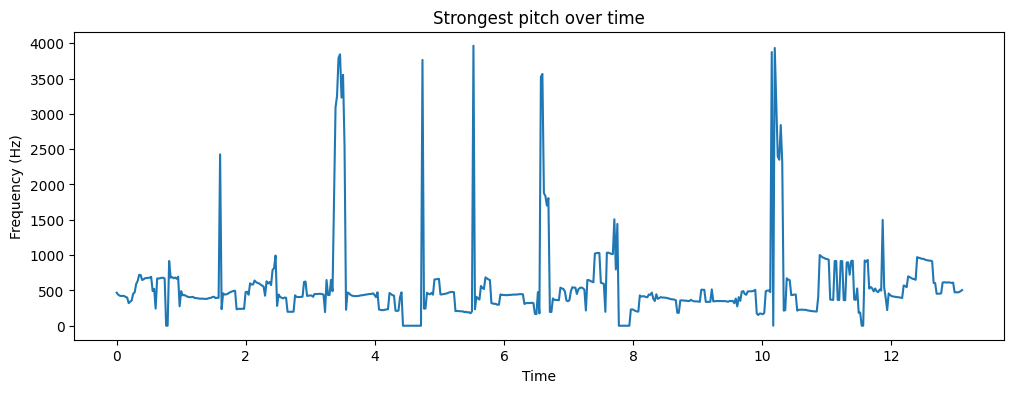

Mean pitch: 581.80 Hz
Pitch standard deviation: 571.66 Hz


In [21]:
for index, row in train_sample_real_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    display(Audio(filename))
    y, sr = librosa.load(filename)

    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # piptrack 함수 사용
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 결과 분석
    time = librosa.times_like(pitches)
    plt.figure(figsize=(12, 8))
    plt.subplot(211)
    plt.title('Estimated pitches')
    plt.imshow(pitches, aspect='auto', origin='lower', interpolation='nearest')
    plt.colorbar(label='Frequency (Hz)')
    plt.ylabel('Frequency bin')
    plt.xlabel('Time')

    plt.subplot(212)
    plt.title('Pitch magnitudes')
    plt.imshow(magnitudes, aspect='auto', origin='lower', interpolation='nearest')
    plt.colorbar(label='Magnitude')
    plt.ylabel('Frequency bin')
    plt.xlabel('Time')

    plt.tight_layout()
    plt.show()

    # 가장 강한 피치 추출
    pitch_strongest = np.argmax(magnitudes, axis=0)
    pitches_strongest = pitches[pitch_strongest, range(pitches.shape[1])]

    plt.figure(figsize=(12, 4))
    plt.plot(time, pitches_strongest)
    plt.title('Strongest pitch over time')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.show()

    # 기본 통계
    pitch_mean = np.mean(pitches_strongest[pitches_strongest > 0])
    pitch_std = np.std(pitches_strongest[pitches_strongest > 0])
    print(f"Mean pitch: {pitch_mean:.2f} Hz")
    print(f"Pitch standard deviation: {pitch_std:.2f} Hz")

## train fake

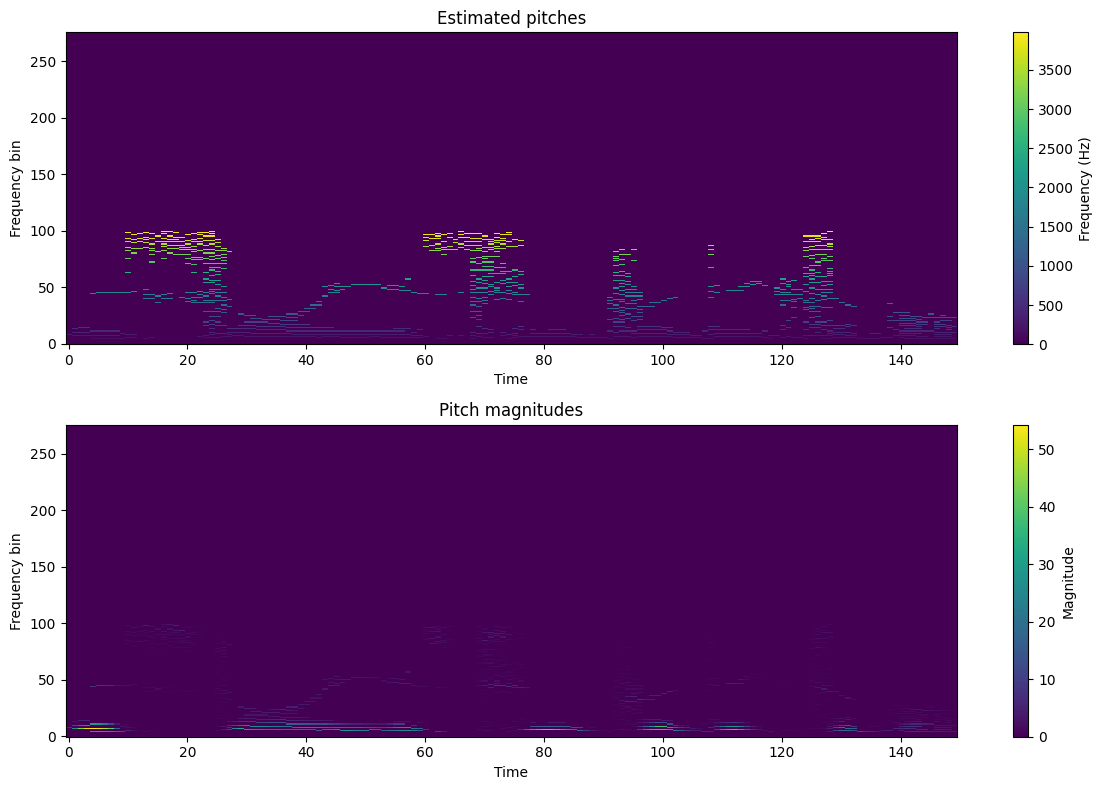

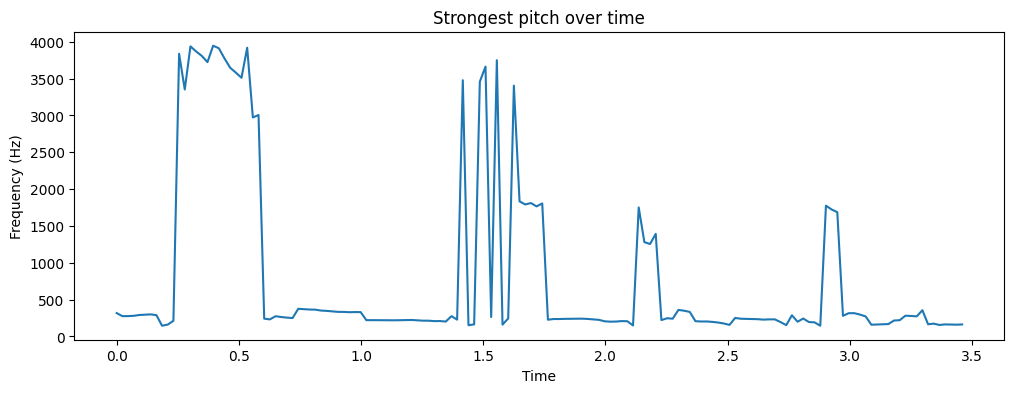

Mean pitch: 804.34 Hz
Pitch standard deviation: 1178.66 Hz


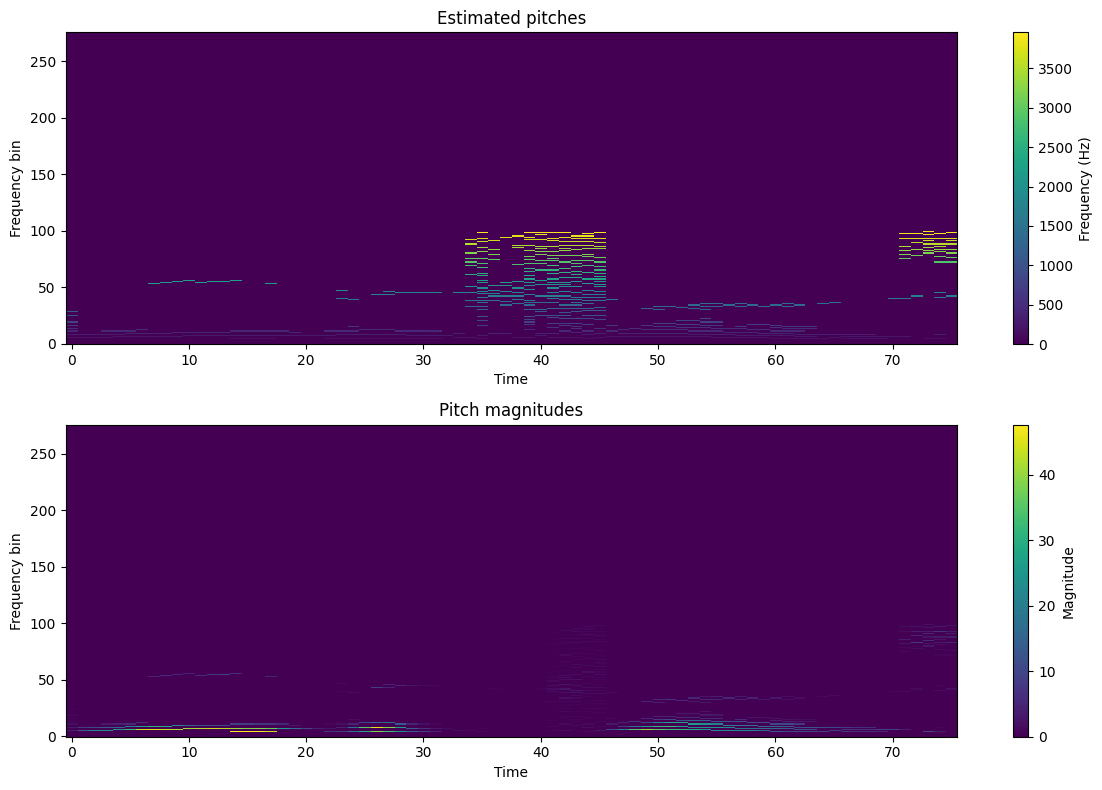

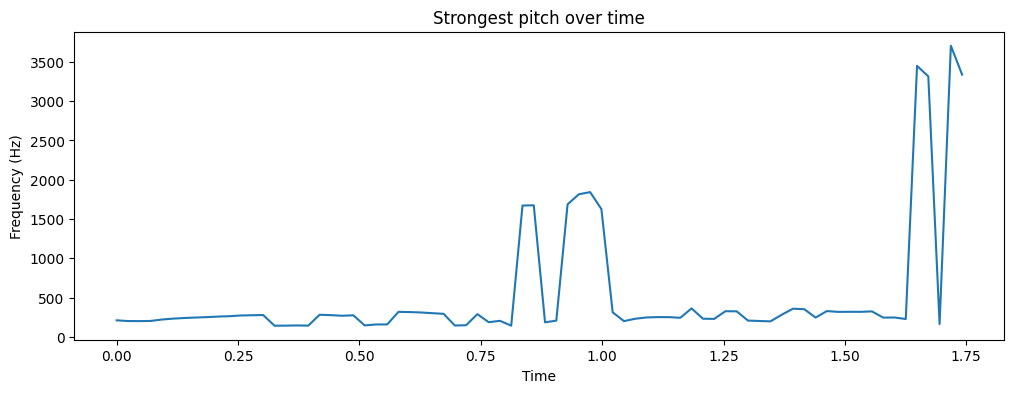

Mean pitch: 528.57 Hz
Pitch standard deviation: 798.54 Hz


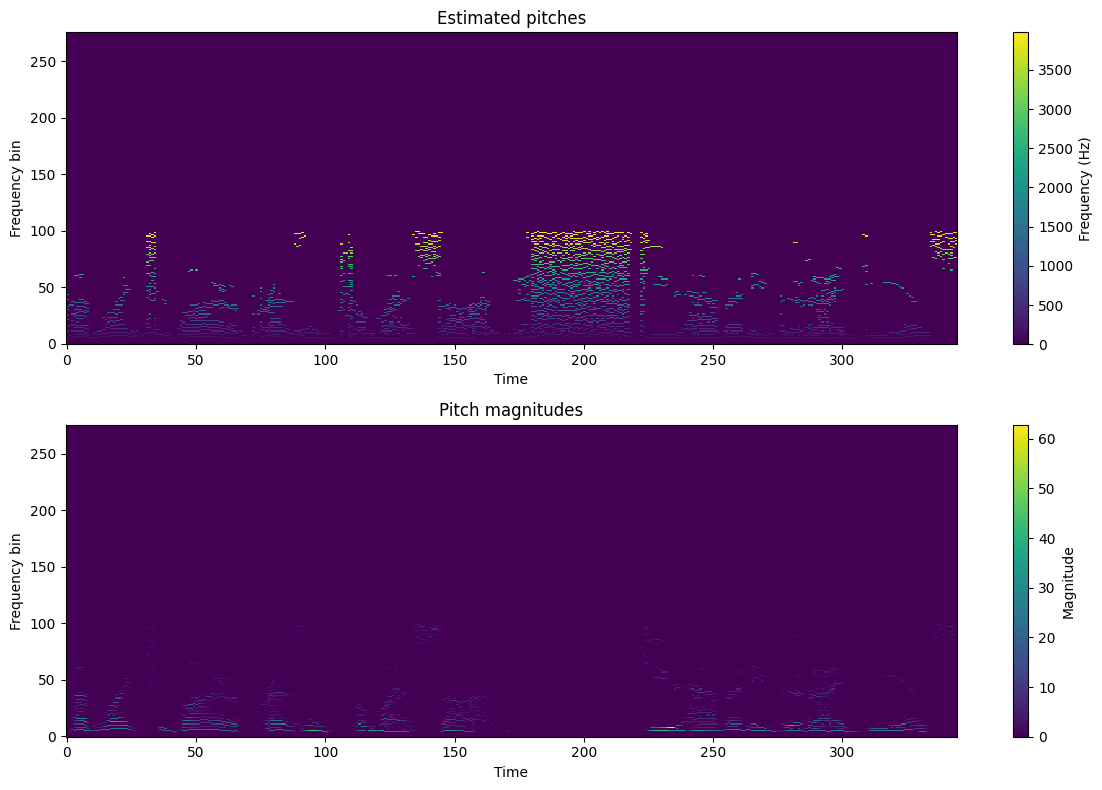

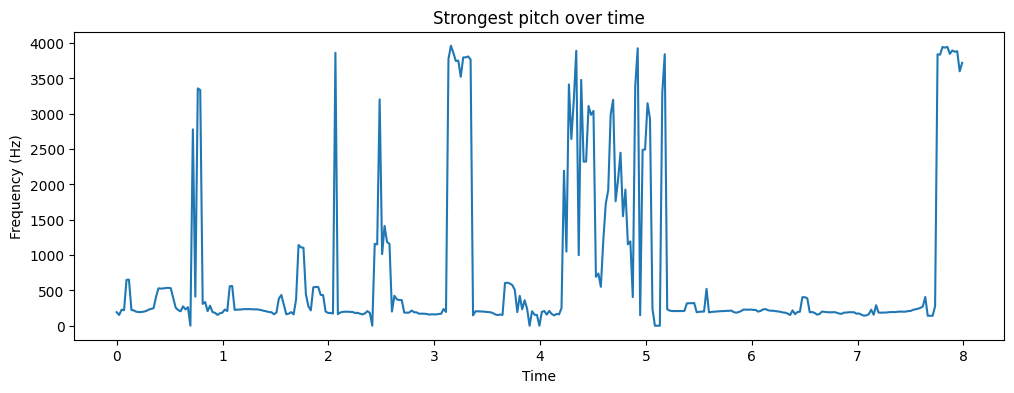

Mean pitch: 760.38 Hz
Pitch standard deviation: 1131.96 Hz


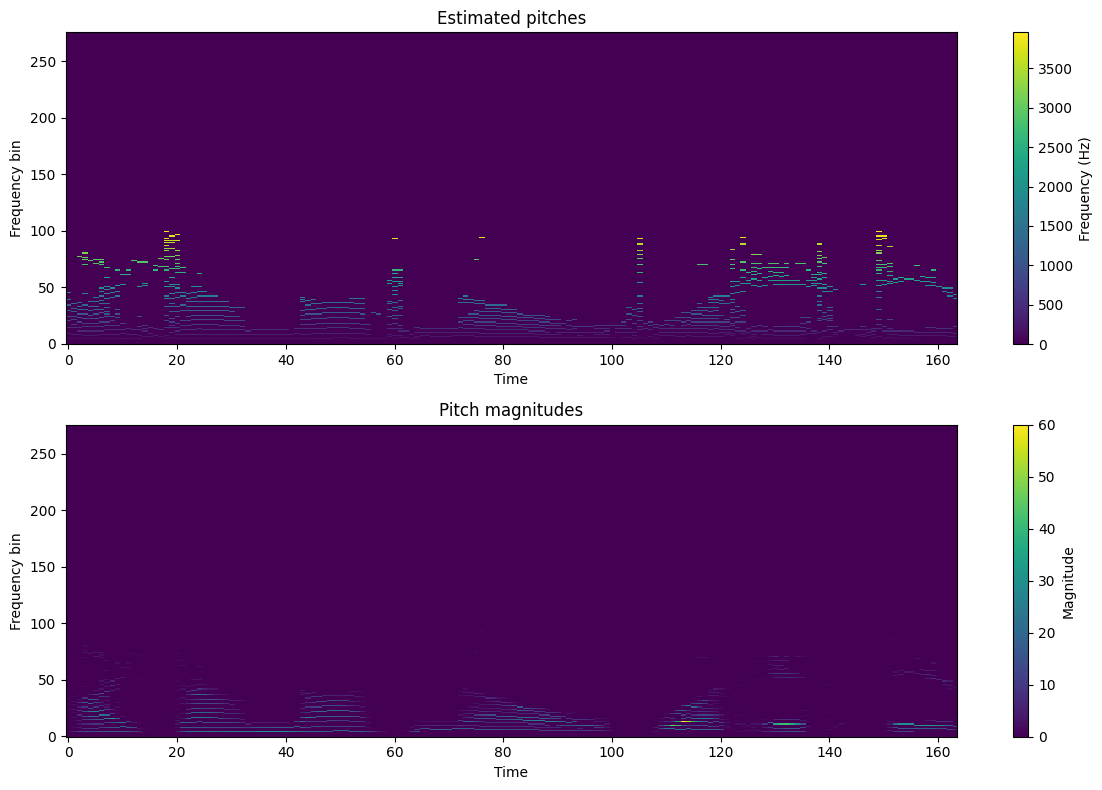

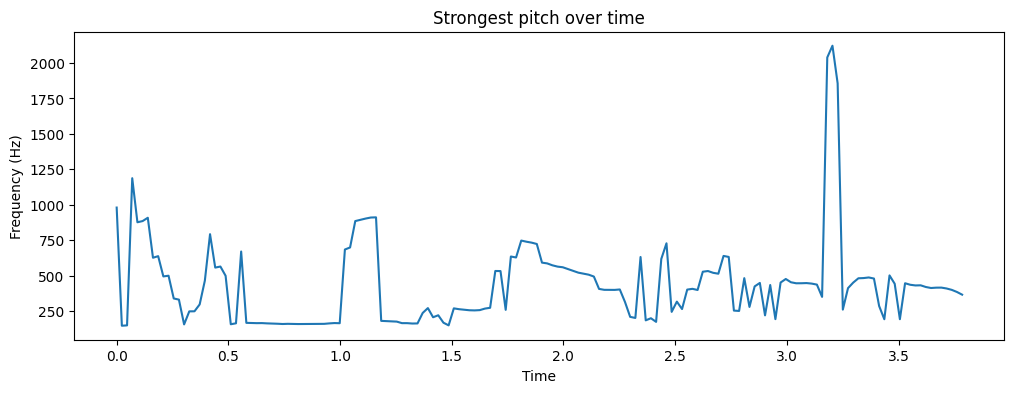

Mean pitch: 434.41 Hz
Pitch standard deviation: 304.39 Hz


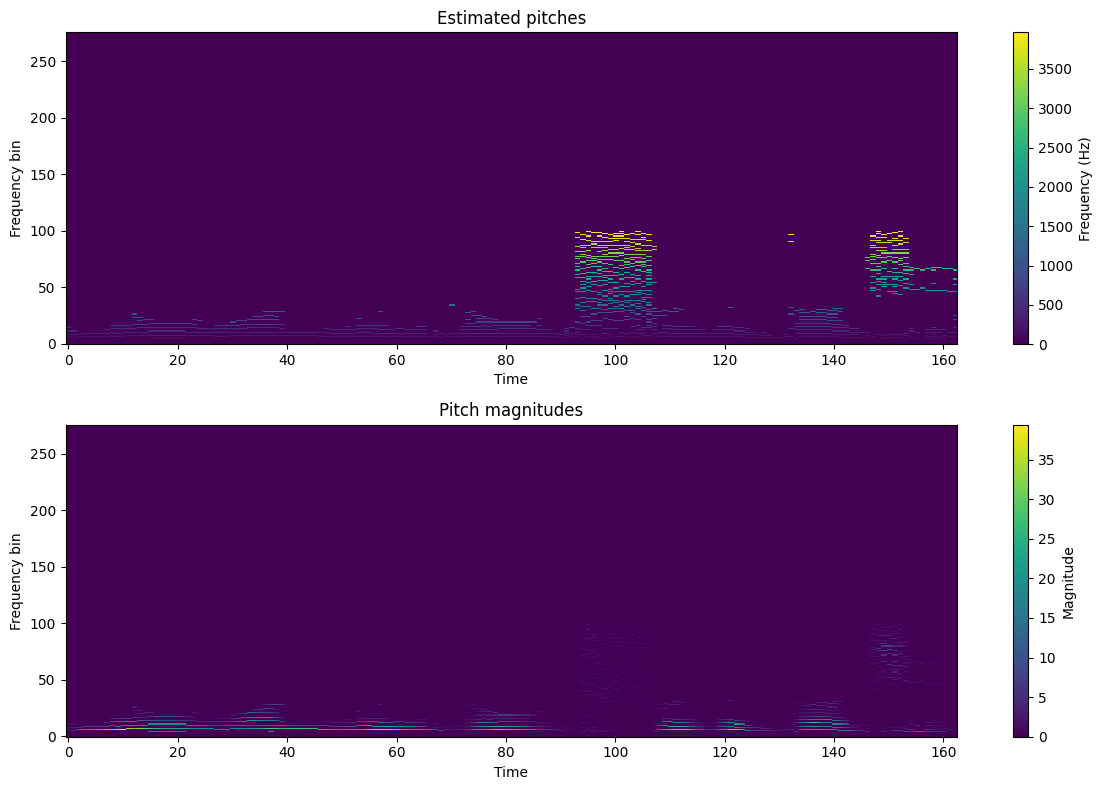

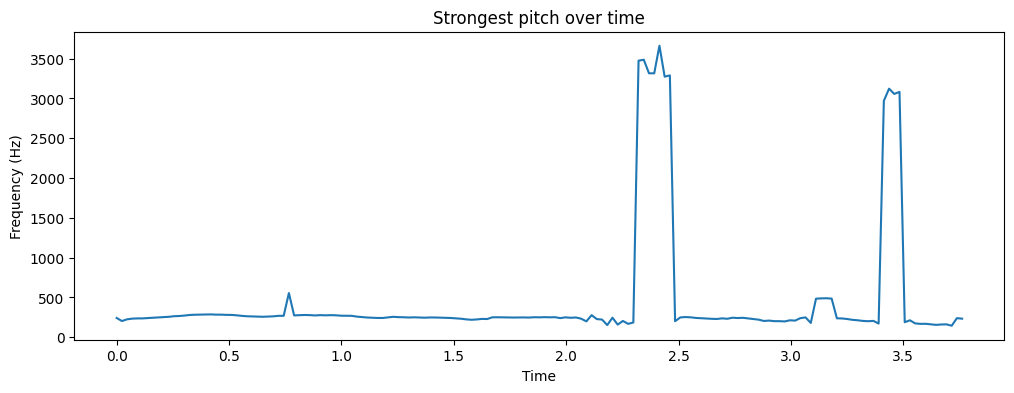

Mean pitch: 450.37 Hz
Pitch standard deviation: 764.04 Hz


In [22]:
for index, row in train_sample_fake_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    display(Audio(filename))
    y, sr = librosa.load(filename)
    
    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # piptrack 함수 사용
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 결과 분석
    time = librosa.times_like(pitches)
    plt.figure(figsize=(12, 8))
    plt.subplot(211)
    plt.title('Estimated pitches')
    plt.imshow(pitches, aspect='auto', origin='lower', interpolation='nearest')
    plt.colorbar(label='Frequency (Hz)')
    plt.ylabel('Frequency bin')
    plt.xlabel('Time')

    plt.subplot(212)
    plt.title('Pitch magnitudes')
    plt.imshow(magnitudes, aspect='auto', origin='lower', interpolation='nearest')
    plt.colorbar(label='Magnitude')
    plt.ylabel('Frequency bin')
    plt.xlabel('Time')

    plt.tight_layout()
    plt.show()

    # 가장 강한 피치 추출
    pitch_strongest = np.argmax(magnitudes, axis=0)
    pitches_strongest = pitches[pitch_strongest, range(pitches.shape[1])]

    plt.figure(figsize=(12, 4))
    plt.plot(time, pitches_strongest)
    plt.title('Strongest pitch over time')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.show()

    # 기본 통계
    pitch_mean = np.mean(pitches_strongest[pitches_strongest > 0])
    pitch_std = np.std(pitches_strongest[pitches_strongest > 0])
    print(f"Mean pitch: {pitch_mean:.2f} Hz")
    print(f"Pitch standard deviation: {pitch_std:.2f} Hz")

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [44]:
# for index, row in test_sample_df.iterrows():
#     audio_file = row['path']
#     print(f"Playing audio file: {audio_file}")
#     display(Audio(audio_file))

()